ANA 540 Midterm Examination - Regression

# Set up to start coding

As before, this Jupyter Notebook is coded to run locally on your computer rather than on Colab or Kaggle.

Start with all the normal things that belong at the beginning of a program

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline:

In [143]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os
import numpy as np
import urllib.request
import pandas as pd
import scipy
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

import plotly.express as px
from plotly import graph_objs as go

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"

# Get the data and start EDA

Get the data and take a look at it.  

To get the data, create a sub-dataframe with variables of interest, and generate summary stats. You can see the variables I've chosen as those of most interest.  You may choose others.    

Remember that the train and test sets have already been setup for you from Kaggle.  You'll need to figure out what the split is from the number of records in each.  There is also other information you should check.  Plus, do not forget to verify the assumptions for doing a regression analysis!  

Don't forget you need the full path to where you saved the data!  

In [144]:
df_train = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\HousingData\train.csv')
df_test = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\HousingData\test.csv')

print("shape of train data: ", df_train.shape)
print("shape of test data: ", df_test.shape)
print()
print()

#Select the variables to use in the regression
df2_train = df_train[['LotArea', "OverallCond", 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", 'TotRmsAbvGrd', "Fireplaces", "GarageArea", "WoodDeckSF", "PoolArea", 'SalePrice']]

print(df_train.info())
print()
print()
print(df2_train.info())
print()
print()
print(df2_train.describe())

shape of train data:  (1460, 81)
shape of test data:  (1459, 80)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null 

In [145]:
df2_train.isnull().sum()

LotArea         0
OverallCond     0
YearBuilt       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
WoodDeckSF      0
PoolArea        0
SalePrice       0
dtype: int64

   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


<AxesSubplot:ylabel='Count'>

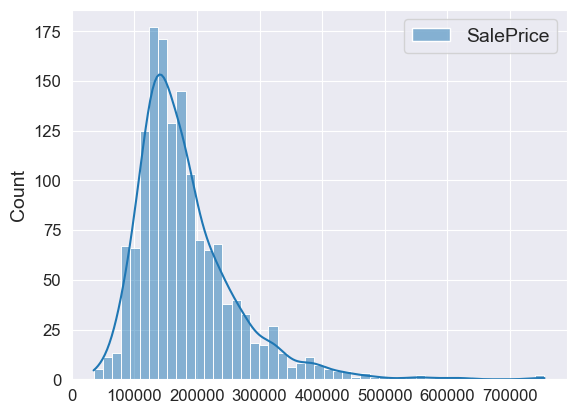

In [146]:
Price_train = df2_train[['SalePrice']]
print(Price_train.head())

#Use Seaborn to generate a histogram

sns.set_style('darkgrid')
sns.histplot(data=Price_train, kde=True)


The histogram looks pretty skewed.  Do you remember which way?  You will need to check the other variables you want to include in your regression analysis!  Do you remember how to correct for this?  


   GrLivArea
0       1710
1       1262
2       1786
3       1717
4       2198


<AxesSubplot:ylabel='Count'>

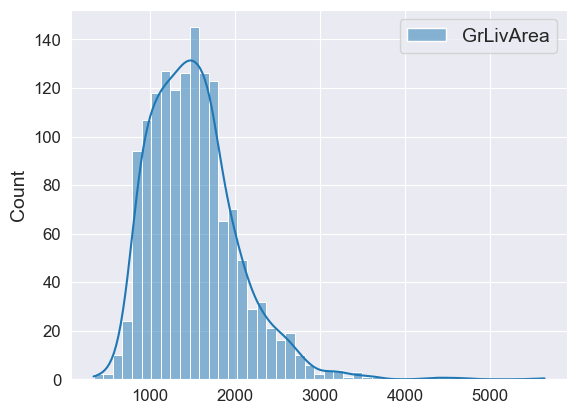

In [147]:
#compare to the total living area listed
area = df_train[["GrLivArea"]]
print()
print(area.head())

sns.set_style('darkgrid')
sns.histplot(data=area, kde=True)


This has some interesting data points.  The distribution doesn't look particularly skewed.  You will want to check the other variables too!  And you'll probably want to do some boxplots and check some correlations...  Unless you have scaled or normalized it, the price of the houses will dwarf the other boxplots.  You could create a new dataframe with just the other variables.  Or, you can just limit the extent of the y-axis.  

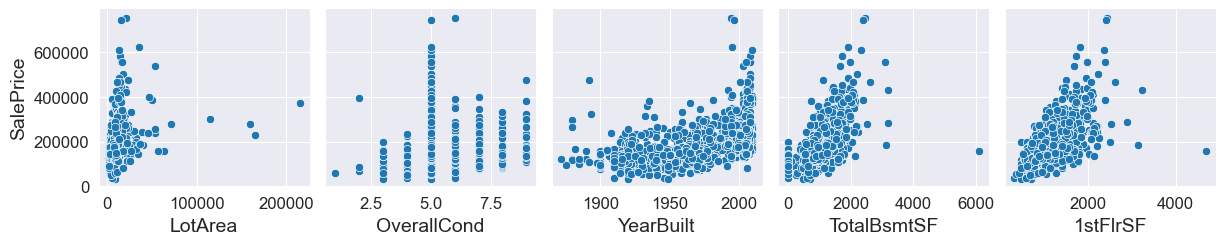

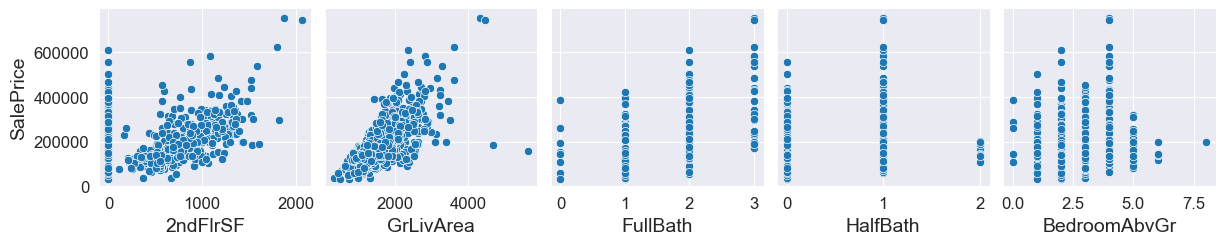

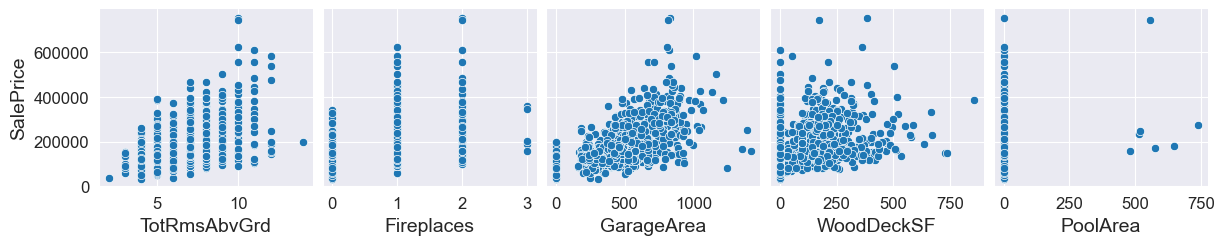

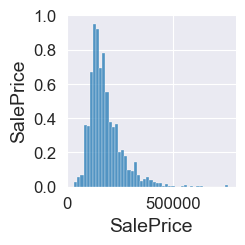

In [148]:
for i in range(0, len(df2_train.columns), 5):
    sns.pairplot(data=df2_train,
                x_vars=df2_train.columns[i:i+5],
                y_vars=['SalePrice'])

It should be pretty obvious which variables are categorical variables!  Plus some of these are not linear!  

(0.0, 600000.0)

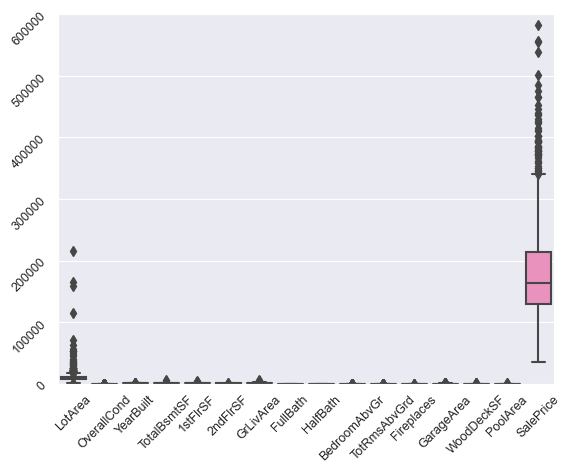

In [149]:
b= sns.boxplot(data=df2_train)
b.tick_params(labelsize=9, rotation=45);
plt.ylim([0, 600000])

(0.0, 20000.0)

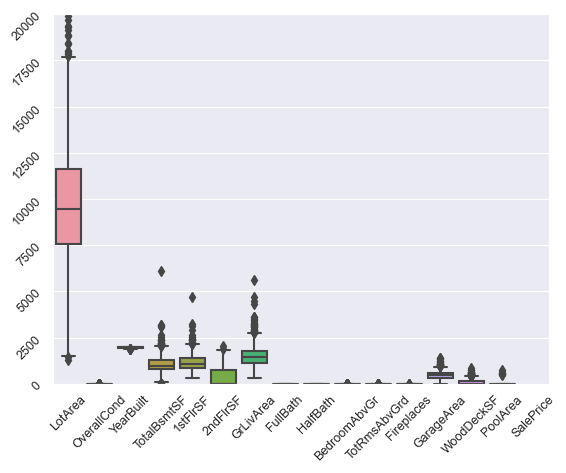

In [150]:
#do you want to scale the SalePrice in order to see the boxplot on the figure with other variables?  
b = sns.boxplot(data=df2_train)
b.tick_params(labelsize=9, rotation=45);
plt.ylim([0,20000])

Here are the correlations, numbers and a heatmap.  

               LotArea  OverallCond  YearBuilt  TotalBsmtSF  1stFlrSF  \
LotArea       1.000000    -0.005636   0.014228     0.260833  0.299475   
OverallCond  -0.005636     1.000000  -0.375983    -0.171098 -0.144203   
YearBuilt     0.014228    -0.375983   1.000000     0.391452  0.281986   
TotalBsmtSF   0.260833    -0.171098   0.391452     1.000000  0.819530   
1stFlrSF      0.299475    -0.144203   0.281986     0.819530  1.000000   
2ndFlrSF      0.050986     0.028942   0.010308    -0.174512 -0.202646   
GrLivArea     0.263116    -0.079686   0.199010     0.454868  0.566024   
FullBath      0.126031    -0.194149   0.468271     0.323722  0.380637   
HalfBath      0.014259    -0.060769   0.242656    -0.048804 -0.119916   
BedroomAbvGr  0.119690     0.012980  -0.070651     0.050450  0.127401   
TotRmsAbvGrd  0.190015    -0.057583   0.095589     0.285573  0.409516   
Fireplaces    0.271364    -0.023820   0.147716     0.339519  0.410531   
GarageArea    0.180403    -0.151521   0.478954     

LotArea         12.207688
OverallCond      0.693067
YearBuilt       -0.613461
TotalBsmtSF      1.524255
1stFlrSF         1.376757
2ndFlrSF         0.813030
GrLivArea        1.366560
FullBath         0.036562
HalfBath         0.675897
BedroomAbvGr     0.211790
TotRmsAbvGrd     0.676341
Fireplaces       0.649565
GarageArea       0.179981
WoodDeckSF       1.541376
PoolArea        14.828374
SalePrice        1.882876
dtype: float64

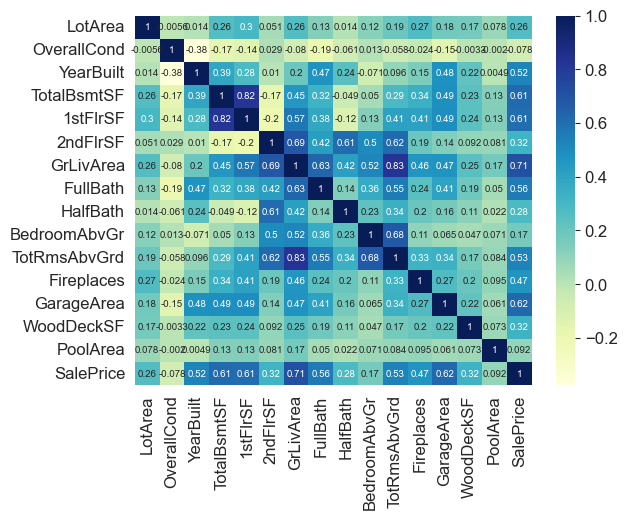

In [151]:
print(df2_train.corr())
dataplot = sns.heatmap(df2_train.corr(), cmap="YlGnBu", annot=True, annot_kws={"size":7})
df2_train.skew()

There are some correlations that we should be concerned about.  But for now we will just forge ahead!  


# Regression Analysis

## Pre-process the data

We'll start each type of regression with this same treatment for the data.  

In [152]:
X = df2_train.iloc[:,:15]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=pd.DataFrame(sc.fit_transform(X))
y=(df2_train.SalePrice / 1000)

#Put the column names back in
X_transform.columns = ['LotArea', "OverallCond", 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", 'TotRmsAbvGrd', "Fireplaces", "GarageArea", "WoodDeckSF", "PoolArea"]
df_X = X_transform

#print(df_X.describe())

df_y = y
df_y.shape
df_X.shape

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_X,df_y,test_size=0.2)

#print()
#print()
#print("Training shape = ",x_train.shape)
#print("Testing shape = ",x_test.shape)


## Linear Regression

In [153]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

In [154]:
y_pred = lin_reg.predict(x_test)

score = lin_reg.score(x_test, y_test)
score

print('Test set evaluation:\n_____________________________________')
print()
print("R2-squared = ",score)
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("MAE = ",MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE = ",MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ",RMSE)
print('\n_____________________________________')
print()
print()

df_results = pd.DataFrame(data=[["Linear Regression", score, MAE, MSE, RMSE]], 
                          columns=['Model', 'R2 Square', 'MAE', 'MSE', 'RMSE'])

Test set evaluation:
_____________________________________

R2-squared =  0.7906530654231269
MAE =  24.16194259545013
MSE =  1605.7592786792786
RMSE =  40.07192631605422

_____________________________________




## Random Forest Regression

In [155]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
score = RF.score(x_test, y_test)
score

print('Test set evaluation:\n_____________________________________')
print()
print("R2-squared = ",score)
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("MAE = ",MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE = ",MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ",RMSE)
print('\n_____________________________________')
print()
print()

RF_results = pd.DataFrame(data=[["Random Forest Regressor", score, MAE, MSE, RMSE]], 
                            columns=['Model', 'R2 Square', 'MAE', 'MSE', 'RMSE'])
df_results = df_results.append(RF_results, ignore_index=True)

Test set evaluation:
_____________________________________

R2-squared =  0.8802167211344478
MAE =  24.16194259545013
MSE =  1605.7592786792786
RMSE =  40.07192631605422

_____________________________________




C:\Users\McDaniel\AppData\Local\Temp\ipykernel_19012\1125197116.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(RF_results, ignore_index=True)


## Stochastic Gradient Descent Regression

In [156]:
#Use the same hyperparameters as the previous SGD
alpha = 0.0001
iters = 2000
m = y.size 
print(m)
theta = np.random.rand(16)
#predictions = hypothesis(X_transform, theta)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, max_iter=2000, n_iter_no_change=25)
sgd_reg.fit(x_train, y_train)

test_pred = sgd_reg.predict(x_test)
train_pred = sgd_reg.predict(x_train)

1460


#Now print out the same results as before for linear regression

In [157]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = sgd_reg.predict(x_test)

score = sgd_reg.score(x_test, y_test)
score

print('Test set evaluation:\n_____________________________________')
print()
print("R2-squared = ",score)
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("MAE = ",MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE = ",MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ",RMSE)
print('\n_____________________________________')
print()
print()

sgd_results = pd.DataFrame(data=[["Stochastic Gradient Descent Regression", score, MAE, MSE, RMSE]], 
                            columns=['Model', 'R2 Square', 'MAE', 'MSE', 'RMSE'])
df_results = df_results.append(sgd_results, ignore_index=True)

Test set evaluation:
_____________________________________

R2-squared =  0.7733251854272861
MAE =  24.75845276674584
MSE =  1738.6697707263693
RMSE =  41.697359277613366

_____________________________________




C:\Users\McDaniel\AppData\Local\Temp\ipykernel_19012\131530556.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(sgd_results, ignore_index=True)


We could play with the hyperparameters; alpha, etc. to improve this but let's move onto Ridge Regression

## Ridge Regression

In [158]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, tol=0.001, solver='cholesky', random_state=42)
ridge_reg.fit(x_train, y_train)
ridge_reg.score(x_train, y_train)
pred = ridge_reg.predict(x_test)

test_pred = ridge_reg.predict(x_test)
train_pred = ridge_reg.predict(x_train)

In [159]:
#Ok, now get the score, MAE, etc.

score = ridge_reg.score(x_test, y_test)
score

print('Test set evaluation:\n_____________________________________')
print()
print("R2-squared = ",score)
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("MAE = ",MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE = ",MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ",RMSE)
print('\n_____________________________________')
print()
print()

ridge_results = pd.DataFrame(data=[["Ridge Regression", score, MAE, MSE, RMSE]], 
                            columns=['Model', 'R2 Square', 'MAE', 'MSE', 'RMSE'])
df_results = df_results.append(ridge_results, ignore_index=True)

Test set evaluation:
_____________________________________

R2-squared =  0.7908796620514805
MAE =  24.75845276674584
MSE =  1738.6697707263693
RMSE =  41.697359277613366

_____________________________________




C:\Users\McDaniel\AppData\Local\Temp\ipykernel_19012\4219104885.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(ridge_results, ignore_index=True)


Not so good!  You can play with the parameters for Ridge regression found at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html if you want to...  

For now let's move onto Lasso regression

## Lasso Regression

In [160]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.10, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
lasso_reg.fit(x_train, y_train)

test_pred = lasso_reg.predict(x_test)
train_pred = lasso_reg.predict(x_train)

In [161]:
#Ok, now get the score, MAE, etc.

score = ridge_reg.score(x_test, y_test)
score

print('Test set evaluation:\n_____________________________________')
print()
print("R2-squared = ",score)
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("MAE = ",MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE = ",MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ",RMSE)
print('\n_____________________________________')
print()
print()

lasso_results = pd.DataFrame(data=[["Lasso Regression", score, MAE, MSE, RMSE]], 
                            columns=['Model', 'R2 Square', 'MAE', 'MSE', 'RMSE'])
df_results = df_results.append(lasso_results, ignore_index=True)

Test set evaluation:
_____________________________________

R2-squared =  0.7908796620514805
MAE =  24.75845276674584
MSE =  1738.6697707263693
RMSE =  41.697359277613366

_____________________________________




C:\Users\McDaniel\AppData\Local\Temp\ipykernel_19012\3086860802.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(lasso_results, ignore_index=True)


I've gotten different results here too.  The results vary from better than the results from Ridge regression to exactly the same thing.

Let's move onto Elastic Net

## Elastic Net Regression

In [162]:
from sklearn.linear_model import ElasticNet

elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
elasticnet_reg.fit(x_train, y_train)

test_pred = elasticnet_reg.predict(x_test)
train_pred = elasticnet_reg.predict(x_train)

In [163]:
#Ok, now get the score, MAE, etc.

score = ridge_reg.score(x_test, y_test)
score

print('Test set evaluation:\n_____________________________________')
print()
print("R2-squared = ",score)
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("MAE = ",MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE = ",MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ",RMSE)
print('\n_____________________________________')
print()
print()

elasticnet_results = pd.DataFrame(data=[["Elastic Net Regression", score, MAE, MSE, RMSE]], 
                            columns=['Model', 'R2 Square', 'MAE', 'MSE', 'RMSE'])
df_results = df_results.append(elasticnet_results, ignore_index=True)

Test set evaluation:
_____________________________________

R2-squared =  0.7908796620514805
MAE =  24.75845276674584
MSE =  1738.6697707263693
RMSE =  41.697359277613366

_____________________________________




C:\Users\McDaniel\AppData\Local\Temp\ipykernel_19012\740852180.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(elasticnet_results, ignore_index=True)


Again, the results can vary.  It looks like Elastic Net did got the same results as Lasso.  Something to think about!  

In [164]:
df_results

,Model,R2 Square,MAE,MSE,RMSE
0,Linear Regression,0.790653,24.161943,1605.759279,40.071926
1,Random Forest Regressor,0.880217,24.161943,1605.759279,40.071926
2,Stochastic Gradient Descent Regression,0.773325,24.758453,1738.669771,41.697359
3,Ridge Regression,0.790880,24.758453,1738.669771,41.697359
4,Lasso Regression,0.790880,24.758453,1738.669771,41.697359
5,Elastic Net Regression,0.790880,24.758453,1738.669771,41.697359


## Conclusions

This is an interesting Jupyter notebook.  It should be fairly easy to change the data, change parameters and hyperparameters in the different types of regression to compare and contrast their results.  

For this exercise it is interesting that Ridge, Lasso and Elastic Net regressions all have the same results.  I've tried a couple different things and reran everything with the same result.

NOTE!!! Nowhere in this Jupyter is the seed set so that it is reproducible from run to run.  You'll find it very frustrating to get different answers each time you run the different regressions.  That is something that is extremely important.  Rather than just put it in the code where you probably wouldn't notice it, I am putting a note here that (hopefully) you will read!

From all that has been done, at the end of the dat Random Forest regression looks like it does the best, i.e. without changing parameter and/or hyperparameter values, etc.  Nor have any corrections been made to the data, e.g. transformations for skew.  

Basically, all that this Jupyter notebook does is provide you with a starting point for running comparisons of different regression techniques.  

## References

Websites accessed for this assignment: 

Kaggle, House Prices - Advanced Regression Techniques at https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques 

Kaggle at https://www.kaggle.com/code/pablo94/house-prices-simple-model-with-high-r2-score 

Kaggle at https://www.kaggle.com/code/zahidfaiz/linear-regression-from-scratch-gradient-descent 

Python for Data Science at https://www.pythonfordatascience.org/anova-python/  

Geeks for Geeks, How To Do Train Test Split Using Sklearn in Python at https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/ 

Towards Data Science, How to Use Random Seeds Effectively at https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79 

Towards Data Science, Linear Regression in Python at https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606 

Practical Introduction to 10 Regression Algorithm at https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm/notebook#%E2%9C%94%EF%B8%8F-Elastic-Net 

sklearn stochastic gradient descent regression at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html 

Data Tech Notes: Regression Example with SGDRegressor in Python at https://www.datatechnotes.com/2020/09/regression-example-with-sgdregressor-in-python.html 

sklearn random forrest regression at https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

sklearn ridge regression at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html 

Scikit Learn - Ridge Regression at https://www.tutorialspoint.com/scikit_learn/scikit_learn_ridge_regression.htm 

sklearn lasso regression at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html 

sklearn elastic net regression at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html 
